<a href="https://colab.research.google.com/github/Ham12-3/AWS-Hands-on-1/blob/master/Untitled0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Load your data (ensure the file path points to your uploaded CSV in Colab)
file_path = '/content/paper-trading-account-history.csv'  # Update with your file name in Colab
data = pd.read_csv(file_path)

Win Rate: 72.92%
Loss Rate: 27.08%
Your win rate is solid. Keep refining your strategy for consistency.


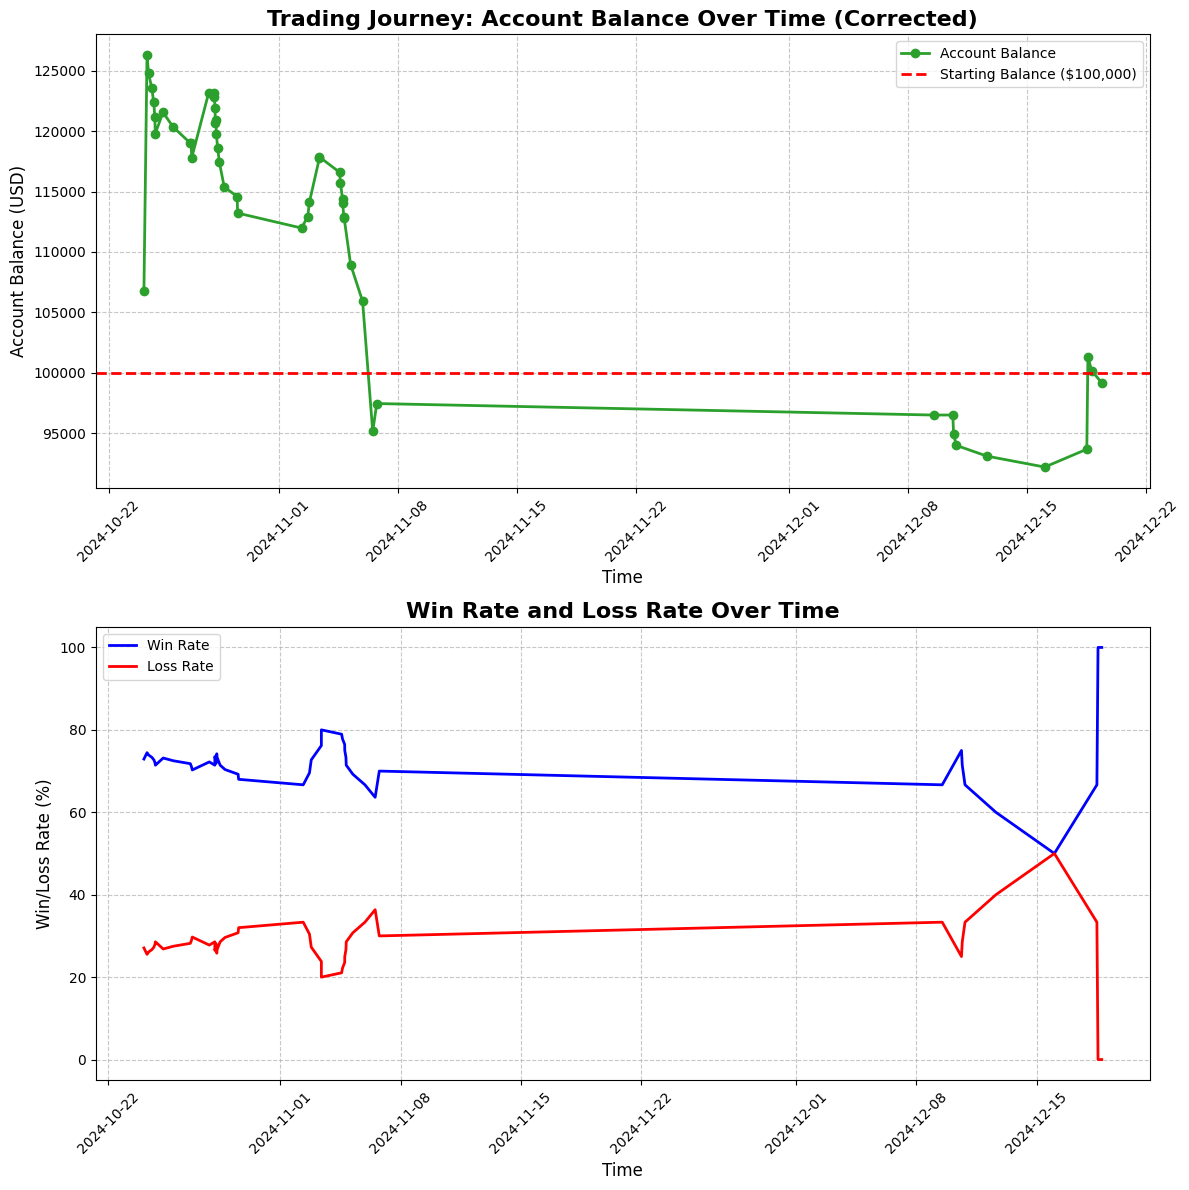

In [13]:

# Correct the final balance to match your updated balance
final_balance_corrected = 106734.28
data.loc[data.index[-1], 'Balance After'] = final_balance_corrected

# Convert Time column to datetime format for proper plotting
data['Time'] = pd.to_datetime(data['Time'])

# Calculate the trade outcomes (win/loss) based on changes in the balance
data['Change'] = data['Balance After'].diff()  # Difference between consecutive balances
data['Outcome'] = data['Change'].apply(lambda x: 'Win' if x > 0 else ('Loss' if x < 0 else 'No Change'))

# Calculate the cumulative number of wins and losses at each point in time
data['Cumulative Wins'] = (data['Outcome'] == 'Win').cumsum()
data['Cumulative Losses'] = (data['Outcome'] == 'Loss').cumsum()

# Calculate cumulative win rate and loss rate at each point in time
data['Win Rate'] = (data['Cumulative Wins'] / (data['Cumulative Wins'] + data['Cumulative Losses'])) * 100
data['Loss Rate'] = (data['Cumulative Losses'] / (data['Cumulative Wins'] + data['Cumulative Losses'])) * 100

# Count the number of wins and losses
win_count = len(data[data['Outcome'] == 'Win'])
loss_count = len(data[data['Outcome'] == 'Loss'])
total_trades = win_count + loss_count

# Calculate win rate and loss rate
win_rate = (win_count / total_trades) * 100 if total_trades > 0 else 0
loss_rate = (loss_count / total_trades) * 100 if total_trades > 0 else 0

# Output the win rate, loss rate, and improvement tips
print(f"Win Rate: {win_rate:.2f}%")
print(f"Loss Rate: {loss_rate:.2f}%")

# Improvement tips
if win_rate < 60:
    print("Consider improving your entry and exit strategies or risk management.")
else:
    print("Your win rate is solid. Keep refining your strategy for consistency.")

# Create a figure with two subplots (one for account balance, one for win/loss rates)
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 12))

# Plot the account balance over time (using ax1)
ax1.plot(data['Time'], data['Balance After'], marker='o', color='#2ca02c', linewidth=2, markersize=6, label='Account Balance')
ax1.axhline(y=100000, color='red', linestyle='--', linewidth=2, label='Starting Balance ($100,000)')
ax1.set_xlabel('Time', fontsize=12)
ax1.set_ylabel('Account Balance (USD)', fontsize=12)
ax1.set_title('Trading Journey: Account Balance Over Time (Corrected)', fontsize=16, fontweight='bold')
ax1.legend(fontsize=10)
ax1.grid(True, linestyle='--', alpha=0.7)
ax1.tick_params(axis='x', rotation=45)

# Plot the win rate and loss rate over time (using ax2)
ax2.plot(data['Time'], data['Win Rate'], color='blue', linestyle='-', linewidth=2, label='Win Rate')
ax2.plot(data['Time'], data['Loss Rate'], color='red', linestyle='-', linewidth=2, label='Loss Rate')
ax2.set_xlabel('Time', fontsize=12)
ax2.set_ylabel('Win/Loss Rate (%)', fontsize=12)
ax2.set_title('Win Rate and Loss Rate Over Time', fontsize=16, fontweight='bold')
ax2.legend(loc='upper left', fontsize=10)
ax2.grid(True, linestyle='--', alpha=0.7)
ax2.tick_params(axis='x', rotation=45)

# Adjust layout to prevent overlap
fig.tight_layout()

# Display the graphs
plt.show()

# Prediction

Predicted Win Rate for 2025: 42.36%


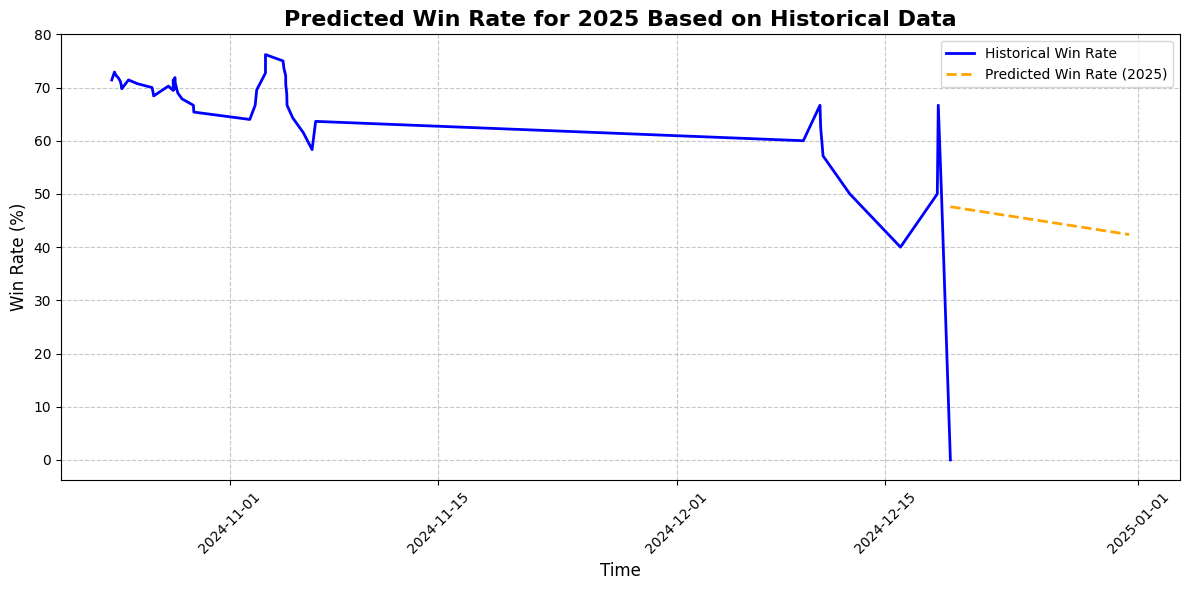

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Load your data (ensure the file path points to your uploaded CSV)
file_path = '/content/paper-trading-account-history.csv'  # Update with your file name in Colab
data = pd.read_csv(file_path)

# Correct the final balance to match your updated balance
final_balance_corrected = 106734.28
data.loc[data.index[-1], 'Balance After'] = final_balance_corrected

# Convert Time column to datetime format for proper plotting
data['Time'] = pd.to_datetime(data['Time'])

# Calculate the trade outcomes (win/loss) based on changes in the balance
data['Change'] = data['Balance After'].diff()  # Difference between consecutive balances
data['Outcome'] = data['Change'].apply(lambda x: 'Win' if x > 0 else ('Loss' if x < 0 else 'No Change'))

# Calculate the cumulative number of wins and losses at each point in time
data['Cumulative Wins'] = (data['Outcome'] == 'Win').cumsum()
data['Cumulative Losses'] = (data['Outcome'] == 'Loss').cumsum()

# Calculate cumulative win rate at each point in time
data['Win Rate'] = (data['Cumulative Wins'] / (data['Cumulative Wins'] + data['Cumulative Losses'])) * 100

# Drop any rows with NaN values in the 'Win Rate' column
data = data.dropna(subset=['Win Rate'])

# Create a feature 'Days' to represent the number of days since the start of the trading history
data['Days'] = (data['Time'] - data['Time'].min()).dt.days

# Fit a linear regression model to the win rate over time
X = data['Days'].values.reshape(-1, 1)  # Reshape for sklearn
y = data['Win Rate'].values

# Ensure there are no NaN values in the target variable (y)
if np.any(np.isnan(y)):
    print("There are NaN values in the target variable (Win Rate). Cleaning the data...")
    data = data.dropna(subset=['Win Rate'])
    y = data['Win Rate'].values

# Fit the linear regression model
model = LinearRegression()
model.fit(X, y)

# Predict the win rate for the next year (2025)
future_days = np.array([(pd.to_datetime('2025-01-01') - data['Time'].min()).days]).reshape(-1, 1)
predicted_win_rate_2025 = model.predict(future_days)

# Output the prediction for 2025
print(f"Predicted Win Rate for 2025: {predicted_win_rate_2025[0]:.2f}%")

# Plot the historical win rate and the predicted trend for 2025
plt.figure(figsize=(12, 6))

# Plot historical win rate
plt.plot(data['Time'], data['Win Rate'], color='blue', linestyle='-', linewidth=2, label='Historical Win Rate')

# Plot the predicted win rate trend (extrapolated)
future_dates = pd.date_range(data['Time'].max(), pd.to_datetime('2025-01-01'), freq='D')
future_win_rate = model.predict(np.array([(date - data['Time'].min()).days for date in future_dates]).reshape(-1, 1))

plt.plot(future_dates, future_win_rate, color='orange', linestyle='--', linewidth=2, label='Predicted Win Rate (2025)')

# Title and labels
plt.title('Predicted Win Rate for 2025 Based on Historical Data', fontsize=16, fontweight='bold')
plt.xlabel('Time', fontsize=12)
plt.ylabel('Win Rate (%)', fontsize=12)
plt.legend(fontsize=10)
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(rotation=45)

# Display the plot
plt.tight_layout()
plt.show()
